# Lags Scope Analysis

Run the model averaging pipeline per scope and review the selected scope's outputs.

In [36]:
from pathlib import Path

import pandas as pd
from IPython.display import SVG, display

from analysis.model_analysis import run_scope_analyses

In [37]:
project_root = Path.cwd()
data_path = project_root / 'data' / 'lags.csv'
output_base = project_root / 'outputs/lags'
scope_name = 'Global'  # change to another scope as needed

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 20)
print(f'Data: {data_path}')
print(f'Output base: {output_base}')
print(f'Selected scope: {scope_name}')

Data: c:\Users\amahai00\OneDrive - Kungl. Vetenskapsakademien\Desktop\Idag\regression\data\lags.csv
Output base: c:\Users\amahai00\OneDrive - Kungl. Vetenskapsakademien\Desktop\Idag\regression\outputs\lags
Selected scope: Global


In [30]:
scope_results = run_scope_analyses(data_path, output_base)
available_scopes = sorted(scope_results.keys())
print('Available scopes:', ', '.join(available_scopes))
if scope_name not in scope_results:
    raise ValueError(f'Scope {{scope_name}} not found; choose one of {{available_scopes}}')
scope_result = scope_results[scope_name]
print(f"Models analyzed for {{scope_name}}: {{scope_result['model_count']}}")

Available scopes: Africa, America, Asia, Europe, Global
Models analyzed for {scope_name}: {scope_result['model_count']}


## Model weights

In [31]:
model_weights = pd.DataFrame(scope_result['model_rows'])
model_weights.head(20)

,spec_id,scope,dv,formula,n,aic,aicc,bic,logLik,converged,delta_aicc,akaike_weight,aicc_rank
0,292a265bd3ea3a266c722ef5ab6eab2d,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3381.641947,3381.688899,3429.893030,-1682.820974,True,0.000000,0.069440,1
1,292a265bd3ea3a266c722ef5ab6eab2d,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3381.641947,3381.688899,3429.893030,-1682.820974,True,0.000000,0.069440,2
2,2a9d0a418fafec33802acb332bf774b0,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + ECONOM...,3076,3382.137713,3382.184664,3430.388795,-1683.068856,True,0.495765,0.054194,3
3,2a9d0a418fafec33802acb332bf774b0,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + ECONOM...,3076,3382.137713,3382.184664,3430.388795,-1683.068856,True,0.495765,0.054194,4
4,5fa56427c51ab014fecc6e637de64a30,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3382.707326,3382.754278,3430.958409,-1683.353663,True,1.065379,0.040763,5
5,5fa56427c51ab014fecc6e637de64a30,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3382.707326,3382.754278,3430.958409,-1683.353663,True,1.065379,0.040763,6
6,e67b57c6e86330d48a4e0692065b399c,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3383.492766,3383.539717,3431.743849,-1683.746383,True,1.850818,0.027524,7
7,f18dd7384f2666970af7f353193038af,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3383.492766,3383.539717,3431.743849,-1683.746383,True,1.850818,0.027524,8
8,e67b57c6e86330d48a4e0692065b399c,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3383.492766,3383.539717,3431.743849,-1683.746383,True,1.850818,0.027524,9
9,f18dd7384f2666970af7f353193038af,Global,Outbreak,Outbreak ~ scale(Year) + Outbreak_lag + CLIMAT...,3076,3383.492766,3383.539717,3431.743849,-1683.746383,True,1.850818,0.027524,10


## Model-averaged coefficients

In [32]:
coef_summary = pd.DataFrame(scope_result['coefficient_summary'])
coef_summary

,term,weight_sum,weighted_estimate,weighted_sd,weighted_std_error
0,POISONING__bin_lag_avg,0.104621,1.156170,1.135529,1.050872
1,ECOLOGICAL__bin_lag_avg,0.082604,0.468325,0.052451,0.593509
2,ECONOMIC_lag_avg,0.420437,0.212593,0.009420,0.091585
3,GEOPHYSICAL_lag_avg,0.058989,0.117000,0.089438,0.107894
4,CLIMATIC_lag_avg,0.593886,0.073603,0.021693,0.020818
5,TECHNOLOGICAL_lag_avg,0.829859,0.072454,0.013722,0.016865
6,INTRASTATE_lag_avg,0.031408,0.055354,0.022420,0.086290
7,TERRORISM_lag_avg,0.015104,-0.000513,0.000087,0.000700
8,INTERSTATE__bin_lag_avg,0.160289,-0.862030,0.151685,0.461676


## Predictor importance

In [33]:
importance = pd.DataFrame(scope_result['importance'])
importance

,term,importance_weight
0,TECHNOLOGICAL_lag_avg,0.829859
1,CLIMATIC_lag_avg,0.593886
2,ECONOMIC_lag_avg,0.420437
3,INTERSTATE__bin_lag_avg,0.160289
4,POISONING__bin_lag_avg,0.104621
5,ECOLOGICAL__bin_lag_avg,0.082604
6,GEOPHYSICAL_lag_avg,0.058989
7,INTRASTATE_lag_avg,0.031408
8,TERRORISM_lag_avg,0.015104


## Scope/DV summary

In [34]:
scope_summary = pd.DataFrame(scope_result['scope_summary'])
scope_summary

,scope,dv,n_models,best_aicc,top_weight
0,Global,Outbreak,4095,3381.688899,0.06944


## Visualisations

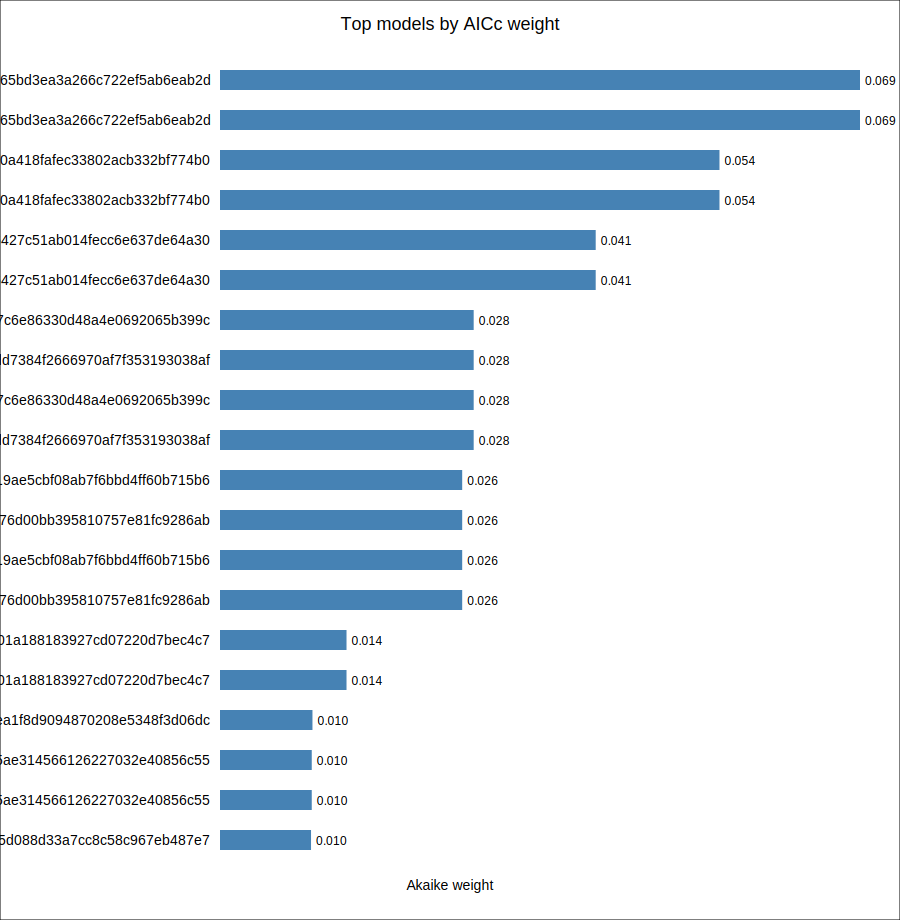

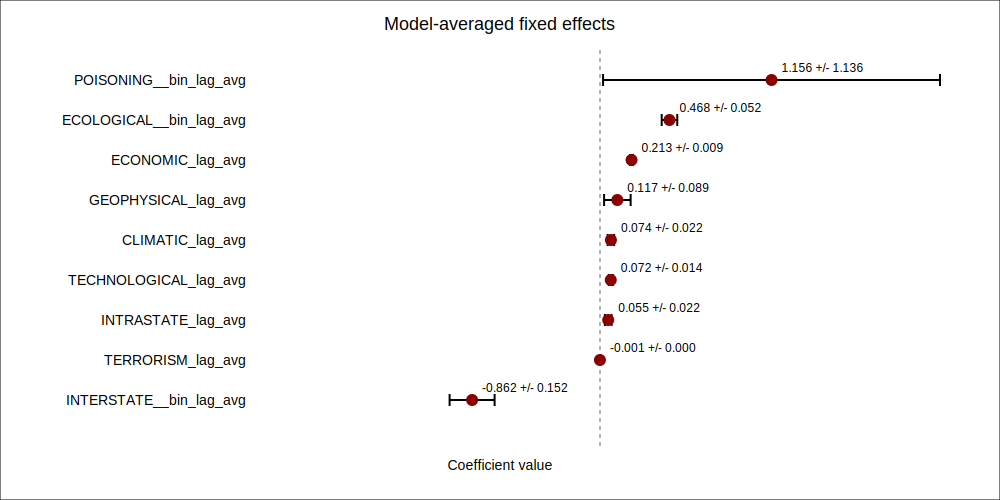

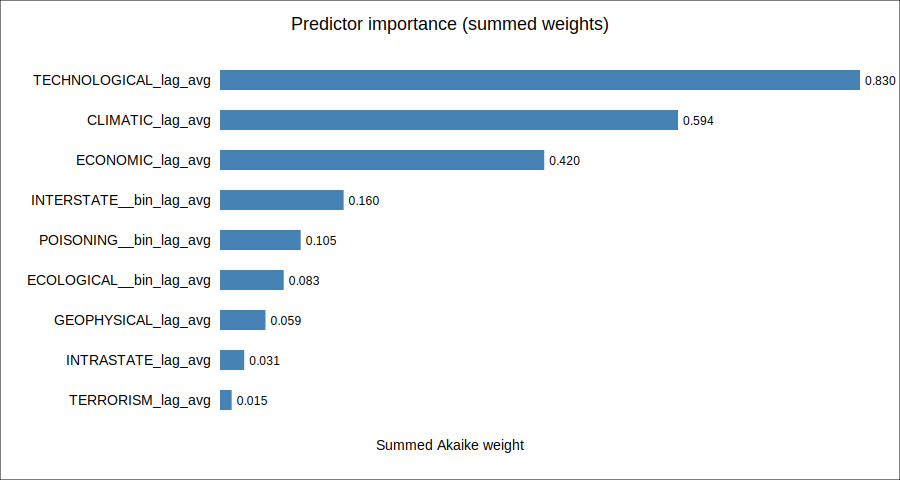

In [35]:
output_paths = scope_result['outputs']
if output_paths['top_model_weights_svg'] and output_paths['top_model_weights_svg'].exists():
    display(SVG(output_paths['top_model_weights_svg'].read_text()))

if output_paths['weighted_coefficients_svg'] and output_paths['weighted_coefficients_svg'].exists():
    display(SVG(output_paths['weighted_coefficients_svg'].read_text()))

if output_paths['predictor_importance_svg'] and output_paths['predictor_importance_svg'].exists():
    display(SVG(output_paths['predictor_importance_svg'].read_text()))